<a href="https://colab.research.google.com/github/Nagmashaik123/Nagma_INFO5731_Spring2021/blob/main/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA and LSA. The following information should be reported:

(1) Features (top n-gram phrases) used for topic modeling.

(2) Top 10 clusters for topic modeling.

(3) Summarize and describe the topic for each cluster. 


Concept on Topic Modelling:
Topic Modeling is an activity which identifies topics automatically present in an object and it analyses , interprets the patterns observed in the text derived by a text corpus. 
The main four purpose of Topic Modelling is to perform: 
a)Document clustering 
b)Large blocks organisation
c)Information retrieval from unstructured text 
d)Feature selection

Here are the steps involved in Model Implementation:
a) Loading and importing libraries
b) Preprocessing of text data
c) Algorithm implementation (using SLDA,LLDA)

Initialising Tomotopy,It is an extensio of python tomoto(Topic Modelling tool). It helps to maximize speed by utilizing a vectorization of modern CPUs. The Tomoto supports several major topic models including SLDA and LLDA.Tomotopy form its derivation from Collapsed Gibbs-Sampling(CGS) to infer the distribution of topics and the distribution of words. 

In [9]:
import pandas as pd
my_data= pd.read_csv("review.csv")
my_data

,Doc_Id,Review
0,Review 1,"Every once in a while a movie comes, that trul..."
1,Review 2,This is a movie that only those who have felt ...
2,Review 3,"Truly a masterpiece, The Best Hollywood film o..."
3,Review 4,Joaquin Phoenix gives a tour de force performa...
4,Review 5,Most of the time movies are anticipated like t...
...,...,...
103,Review 104,"Truly a masterpiece, The Best Hollywood film o..."
104,Review 105,"The acting, cinematography, sound design and t..."
105,Review 106,If you plan on watching this I would suggest s...
106,Review 107,"If it wasn't for the title and make-up, you wo..."


In [25]:
Reviews=[]
for item in my_data['Review']:
    Reviews.append(item)
print("The total reviews : ",len(reviews))

The total reviews :  108


In [1]:
!pip install tomotopy

     |████████████████████████████████| 15.7MB 245kB/s 


In [3]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 11.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=4f67fec205d49c862f36deeb2a20d0ab35fb5732b75e5edd3a593c79656c97b4
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [4]:
#Importing necessary libraries

import json
import zipfile
import glob
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import spacy
import os
import logging
import nltk
import numpy as np
import matplotlib.pyplot as plt
import tomotopy as tp
import numpy as np
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [7]:
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
stop_words = stopwords.words('english')


In [11]:
# Data Processing

#converting to lower case
my_data['Review']=my_data['Review'].map(lambda item: item.lower())
#removing punctutations
my_data['Review']=my_data['Review'].map(lambda item: re.sub('[?|!|\'|"|#]', '', item))
#Lemmitizing
my_data['Review']=my_data['Review'].apply(lambda item:" ".join(item for item in item.split() if item not in words))
my_data['Review']=my_data['Review'].apply(lambda item: " ".join([Word(word).lemmatize() for word in item.split()]))
my_data

,Doc_Id,Review
0,Review 1,"every movie comes, truly make impact. joaquins..."
1,Review 2,movie felt alone isolated truly relate it. und...
2,Review 3,"truly masterpiece, best hollywood film 2019, o..."
3,Review 4,joaquin phoenix give tour de force performance...
4,Review 5,"time movie anticipated like end falling short,..."
...,...,...
103,Review 104,"truly masterpiece, best hollywood film 2019, o..."
104,Review 105,"acting, cinematography, sound design script ph..."
105,Review 106,plan watching would suggest skipping last 20 3...
106,Review 107,"wasnt title make-up, wouldnt know based comic-..."


In [13]:
#Topic Modelling using Supervised LDA algorithm
# Reading for top 10 topics

modelSLDA = tp.SLDAModel(k=10) 
for item in my_data['Review']:
    modelSLDA.add_doc(item.split())
for item in range(0, 100, 10):
    modelSLDA.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(item, modelSLDA.ll_per_word))
for k in range(modelSLDA.k):
    print('Top 15 words of topic #{}'.format(k))
    print(modelSLDA.get_topic_words(k, top_n=25))

modelSLDA.summary()

Iteration: 0	Log-likelihood: -9.018892711351725
Iteration: 10	Log-likelihood: -8.899208282922487
Iteration: 20	Log-likelihood: -8.864666349214444
Iteration: 30	Log-likelihood: -8.857202506910568
Iteration: 40	Log-likelihood: -8.850868888168002
Iteration: 50	Log-likelihood: -8.831314981927886
Iteration: 60	Log-likelihood: -8.85186759634836
Iteration: 70	Log-likelihood: -8.82438244496653
Iteration: 80	Log-likelihood: -8.822181665134272
Iteration: 90	Log-likelihood: -8.817499963470787
Top 15 words of topic #0
[('joaquin', 0.05317572504281998), ('one', 0.04638877883553505), ('best', 0.04412646219134331), ('joker', 0.03507720306515694), ('way', 0.02715909853577614), ('acting', 0.022634467110037804), ('much', 0.022634467110037804), ('make', 0.01924099400639534), ('real', 0.01810983568429947), ('great', 0.01810983568429947), ('phoenix', 0.01810983568429947), ('u', 0.015847520902752876), ('time', 0.013585205189883709), ('time.', 0.011322889477014542), ('hollywood', 0.011322889477014542), ('boo

In [14]:
topic_term_dists = np.stack([modelSLDA.get_topic_word_dist(k) for k in range(modelSLDA.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in modelSLDA.docs])
doc_lengths = np.array([len(doc.words) for doc in modelSLDA.docs])
vocab = list(modelSLDA.used_vocabs)
term_frequency = modelSLDA.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

In [15]:
pyLDAvis.display(prepared_data)

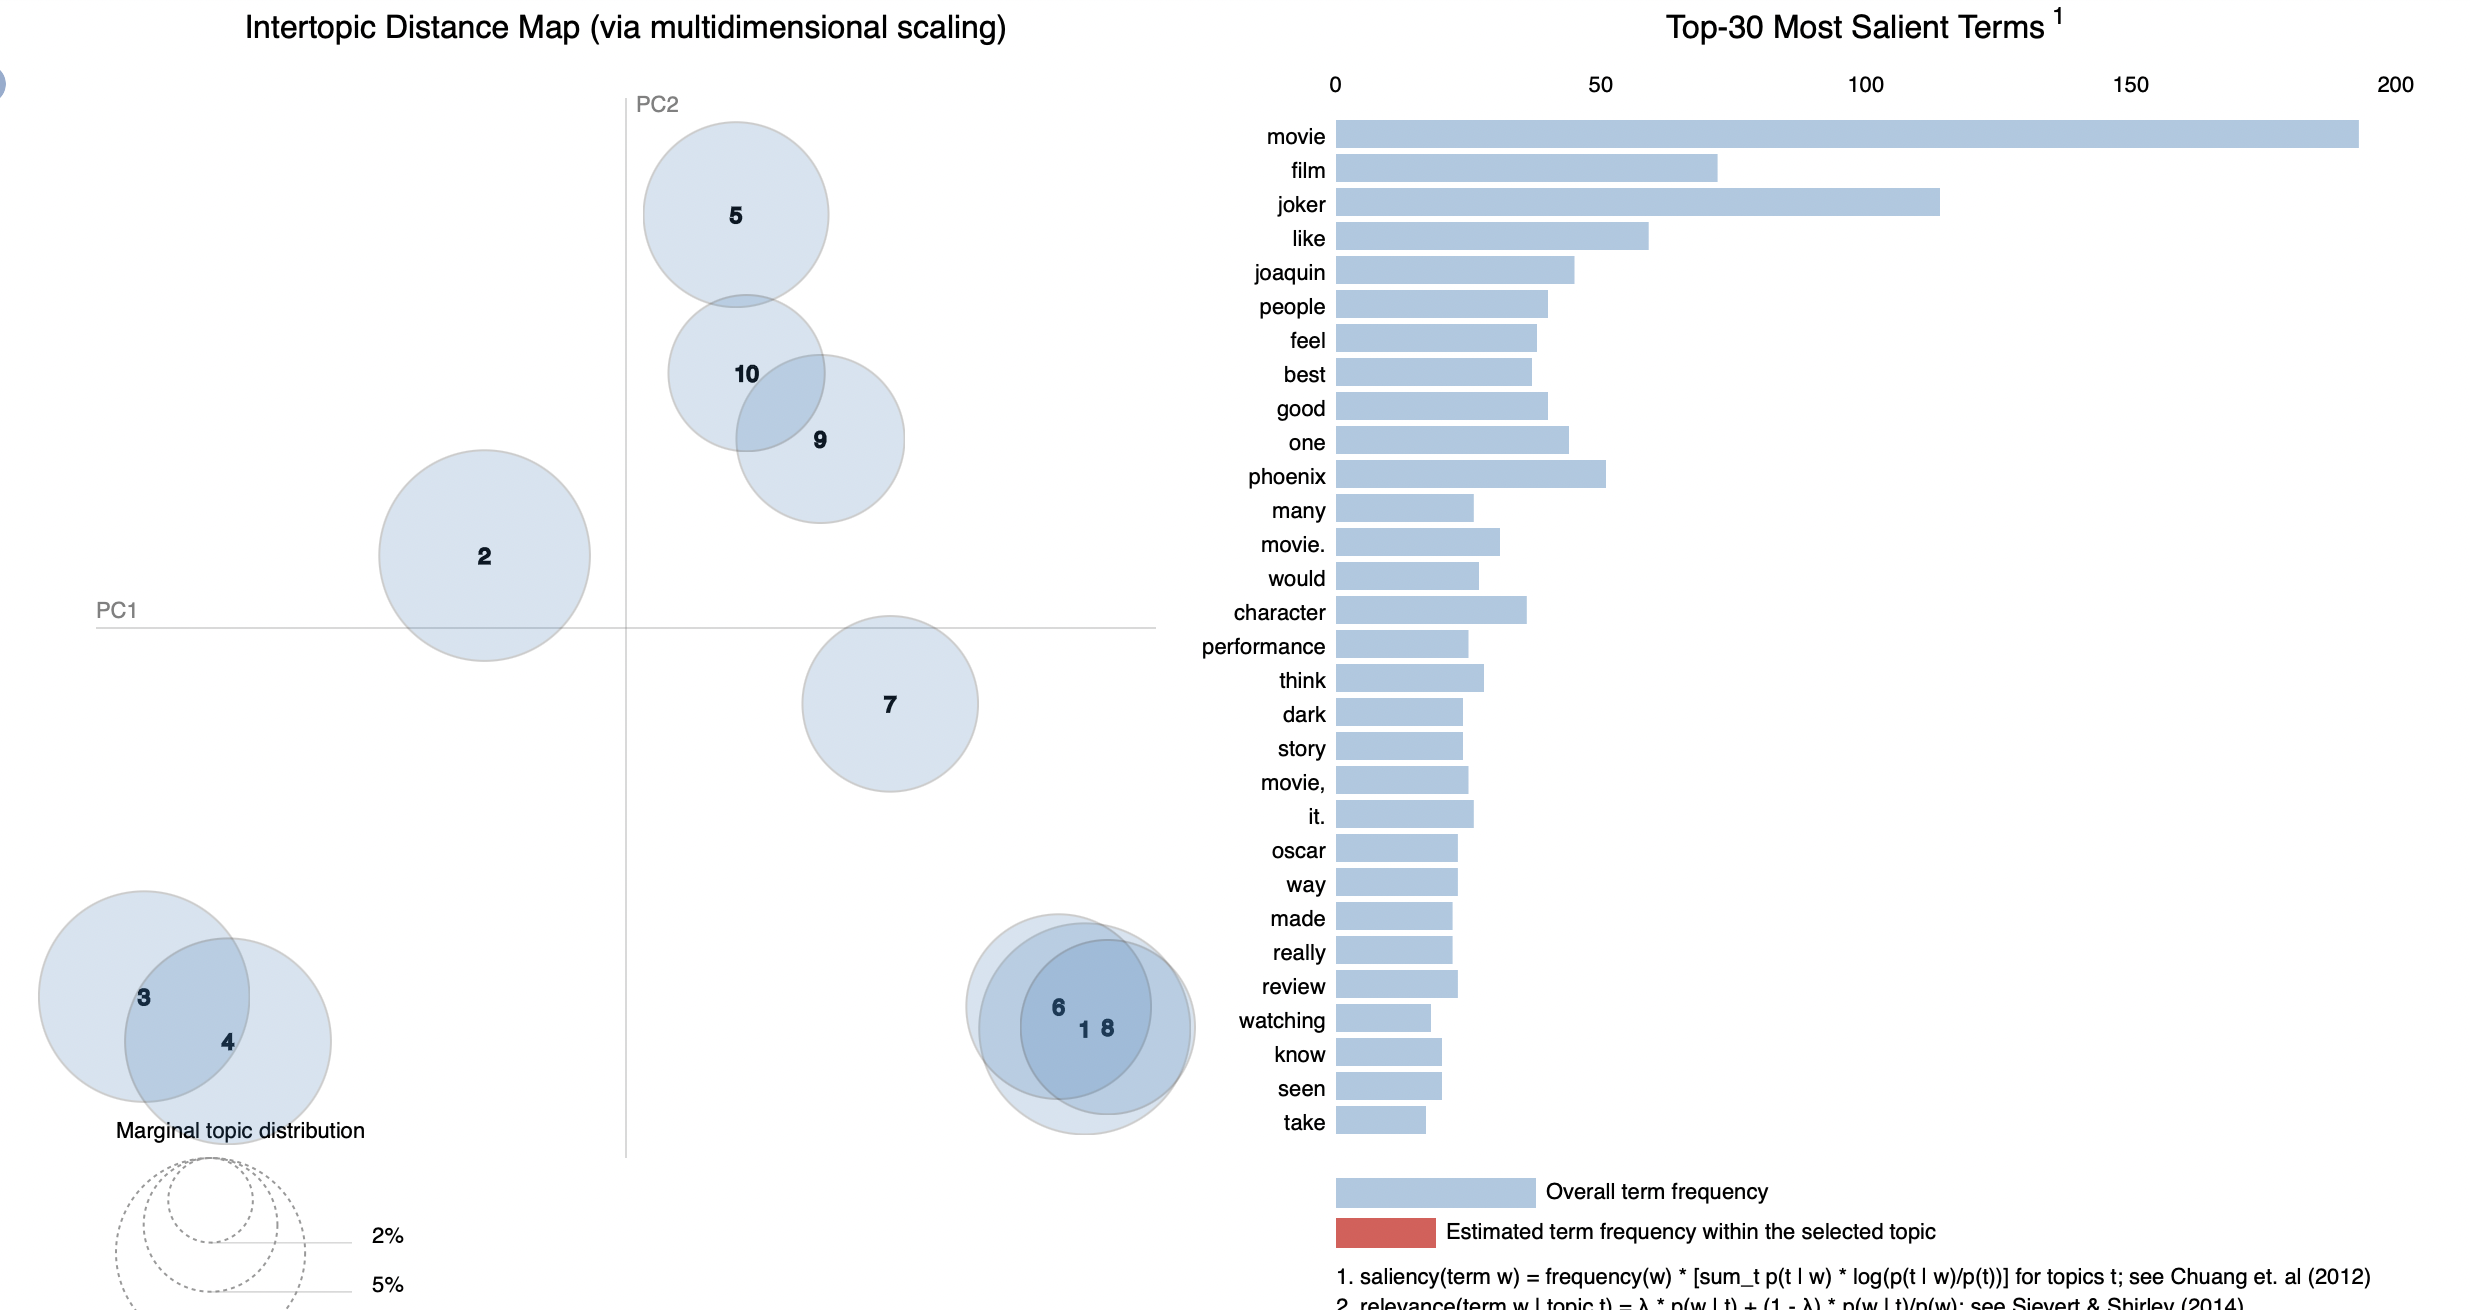

In [28]:
ReviewData = [re.sub('\S*@\S*\s?', '', sent) for sent in Reviews]
ReviewData = [re.sub('\s+', ' ', sent) for sent in Reviews]
ReviewData = [re.sub("\'", "", sent) for sent in Reviews]

<input>:1: DeprecationWarning: invalid escape sequence \S
<input>:1: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \s
<input>:1: DeprecationWarning: invalid escape sequence \S
<input>:2: DeprecationWarning: invalid escape sequence \s
<ipython-input-28-4c4143fe9bc1>:1: DeprecationWarning: invalid escape sequence \S
  ReviewData = [re.sub('\S*@\S*\s?', '', sent) for sent in Reviews]
<ipython-input-28-4c4143fe9bc1>:2: DeprecationWarning: invalid escape sequence \s
  ReviewData = [re.sub('\s+', ' ', sent) for sent in Reviews]


In [35]:
def wordTokens(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

wordList = list(wordTokens(ReviewData))
wordList

[['every',
  'movie',
  'comes',
  'truly',
  'make',
  'impact',
  'joaquins',
  'performance',
  'scenography',
  'brilliance',
  'grotesque',
  'haunting',
  'cringy',
  'hard',
  'watch',
  'times',
  'mesmerizing',
  'wont',
  'blink',
  'eye',
  'watching',
  'it',
  'tragic',
  'seriously',
  'funny',
  'moments',
  'emotional',
  'rollercoaster',
  'sometimes',
  'multiple',
  'emotion',
  'popping',
  'up',
  'time',
  'far',
  'typical',
  'action',
  'riddled',
  'predictable',
  'super',
  'hero',
  'movie',
  'proper',
  'psychological',
  'thriller',
  'drama',
  'single',
  'best',
  'character',
  'development',
  'ever',
  'seen'],
 ['movie',
  'felt',
  'alone',
  'isolated',
  'truly',
  'relate',
  'it',
  'understand',
  'motive',
  'feel',
  'sorry',
  'character',
  'lot',
  'people',
  'see',
  'movie',
  'think',
  'encourages',
  'violence',
  'truly',
  'movie',
  'encourage',
  'every',
  'one',
  'become',
  'better',
  'person',
  'treat',
  'everyone',
  

In [38]:
bigramData = gensim.models.Phrases(wordList, min_count=5, threshold=50) # higher threshold fewer phrases.
bigram_mod = gensim.models.phrases.Phraser(bigramData)


In [39]:
def Stopwords(sentences):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in sentences]
def Bigrams(sentences):
    return [bigram_mod[doc] for doc in sentences]
def lemmatization(sentences, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in sentences:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [42]:
words_nostops = Stopwords(wordList) # Calling stopswords
words_bigrams = Bigrams(words_nostops) # Calling Bigrams
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
id2word = corpora.Dictionary(data_lemmatized)
sentences = data_lemmatized
corpus = [id2word.doc2bow(sentence) for sentence in sentences]

In [43]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [44]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.040*"go" + 0.038*"movie" + 0.035*"well" + 0.024*"joker" + 0.023*"say" + 0.021*"would" + 0.020*"act" + 0.013*"completely" + 0.012*"bore" + 0.012*"show"'), (1, '0.031*"give" + 0.030*"moment" + 0.018*"fact" + 0.016*"ago" + 0.016*"explain" + 0.016*"imho" + 0.016*"friendly" + 0.016*"load" + 0.016*"damn" + 0.016*"dy"'), (2, '0.045*"make" + 0.039*"joker" + 0.033*"even" + 0.031*"different" + 0.023*"real" + 0.020*"try" + 0.019*"forget" + 0.019*"pain" + 0.017*"movie" + 0.015*"character"'), (3, '0.006*"cringe" + 0.006*"attention" + 0.005*"lot" + 0.004*"praise" + 0.004*"situation" + 0.003*"dance" + 0.003*"base" + 0.003*"unheard" + 0.003*"relatable" + 0.003*"voice"'), (4, '0.009*"feel" + 0.008*"human" + 0.008*"deep" + 0.008*"watch" + 0.007*"madness" + 0.007*"difficult" + 0.007*"moment" + 0.006*"money" + 0.006*"write" + 0.005*"heavy"'), (5, '0.042*"film" + 0.038*"movie" + 0.028*"good" + 0.027*"see" + 0.027*"performance" + 0.027*"time" + 0.026*"character" + 0.024*"say" + 0.021*"main" + 0.020*

In [45]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.015137 -0.140271       1        1  40.895557
5     -0.147136 -0.169663       2        1  13.020666
2     -0.000915  0.126556       3        1  12.773721
0     -0.095567 -0.078773       4        1  10.392087
9     -0.245968  0.181407       5        1   7.936870
4      0.084258 -0.014313       6        1   5.181956
8      0.113958  0.031318       7        1   5.072343
6      0.077887  0.012749       8        1   2.332725
1      0.156244  0.036664       9        1   1.658432
3      0.072375  0.014325      10        1   0.735642, topic_info=          Term        Freq       Total Category  logprob  loglift
80        film   69.000000   69.000000  Default  30.0000  30.0000
117         go   47.000000   47.000000  Default  29.0000  29.0000
19       movie  202.000000  202.000000  Default  28.0000  28.0000
50      people   50.000000   50.000000  Default  27.0000  27.0000
16        make   68.000000   68.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
407  situation    0.135118    1.786563  Topic10  -5.6470   2.3303
498      dance    0.130212    2.289739  Topic10  -5.6840   2.0452
47         lot    0.206887    4.496300  Topic10  -5.2210   1.8333
395       base    0.125058    8.172625  Topic10  -5.7244   0.7324
114       fact    0.124487    2.364252  Topic10  -5.7289   1.9682

[474 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
287       7  0.612670    able
61        2  0.324748     act
61        4  0.357223     act
61        5  0.292273     act
0         2  0.778947  action
...     ...       ...     ...
259       4  0.249202   would
465       1  0.702812   write
465       6  0.281125   write
392       1  0.941118   wrong
393       1  0.919569    year

[480 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 3, 1, 10, 5, 9, 7, 2, 4])

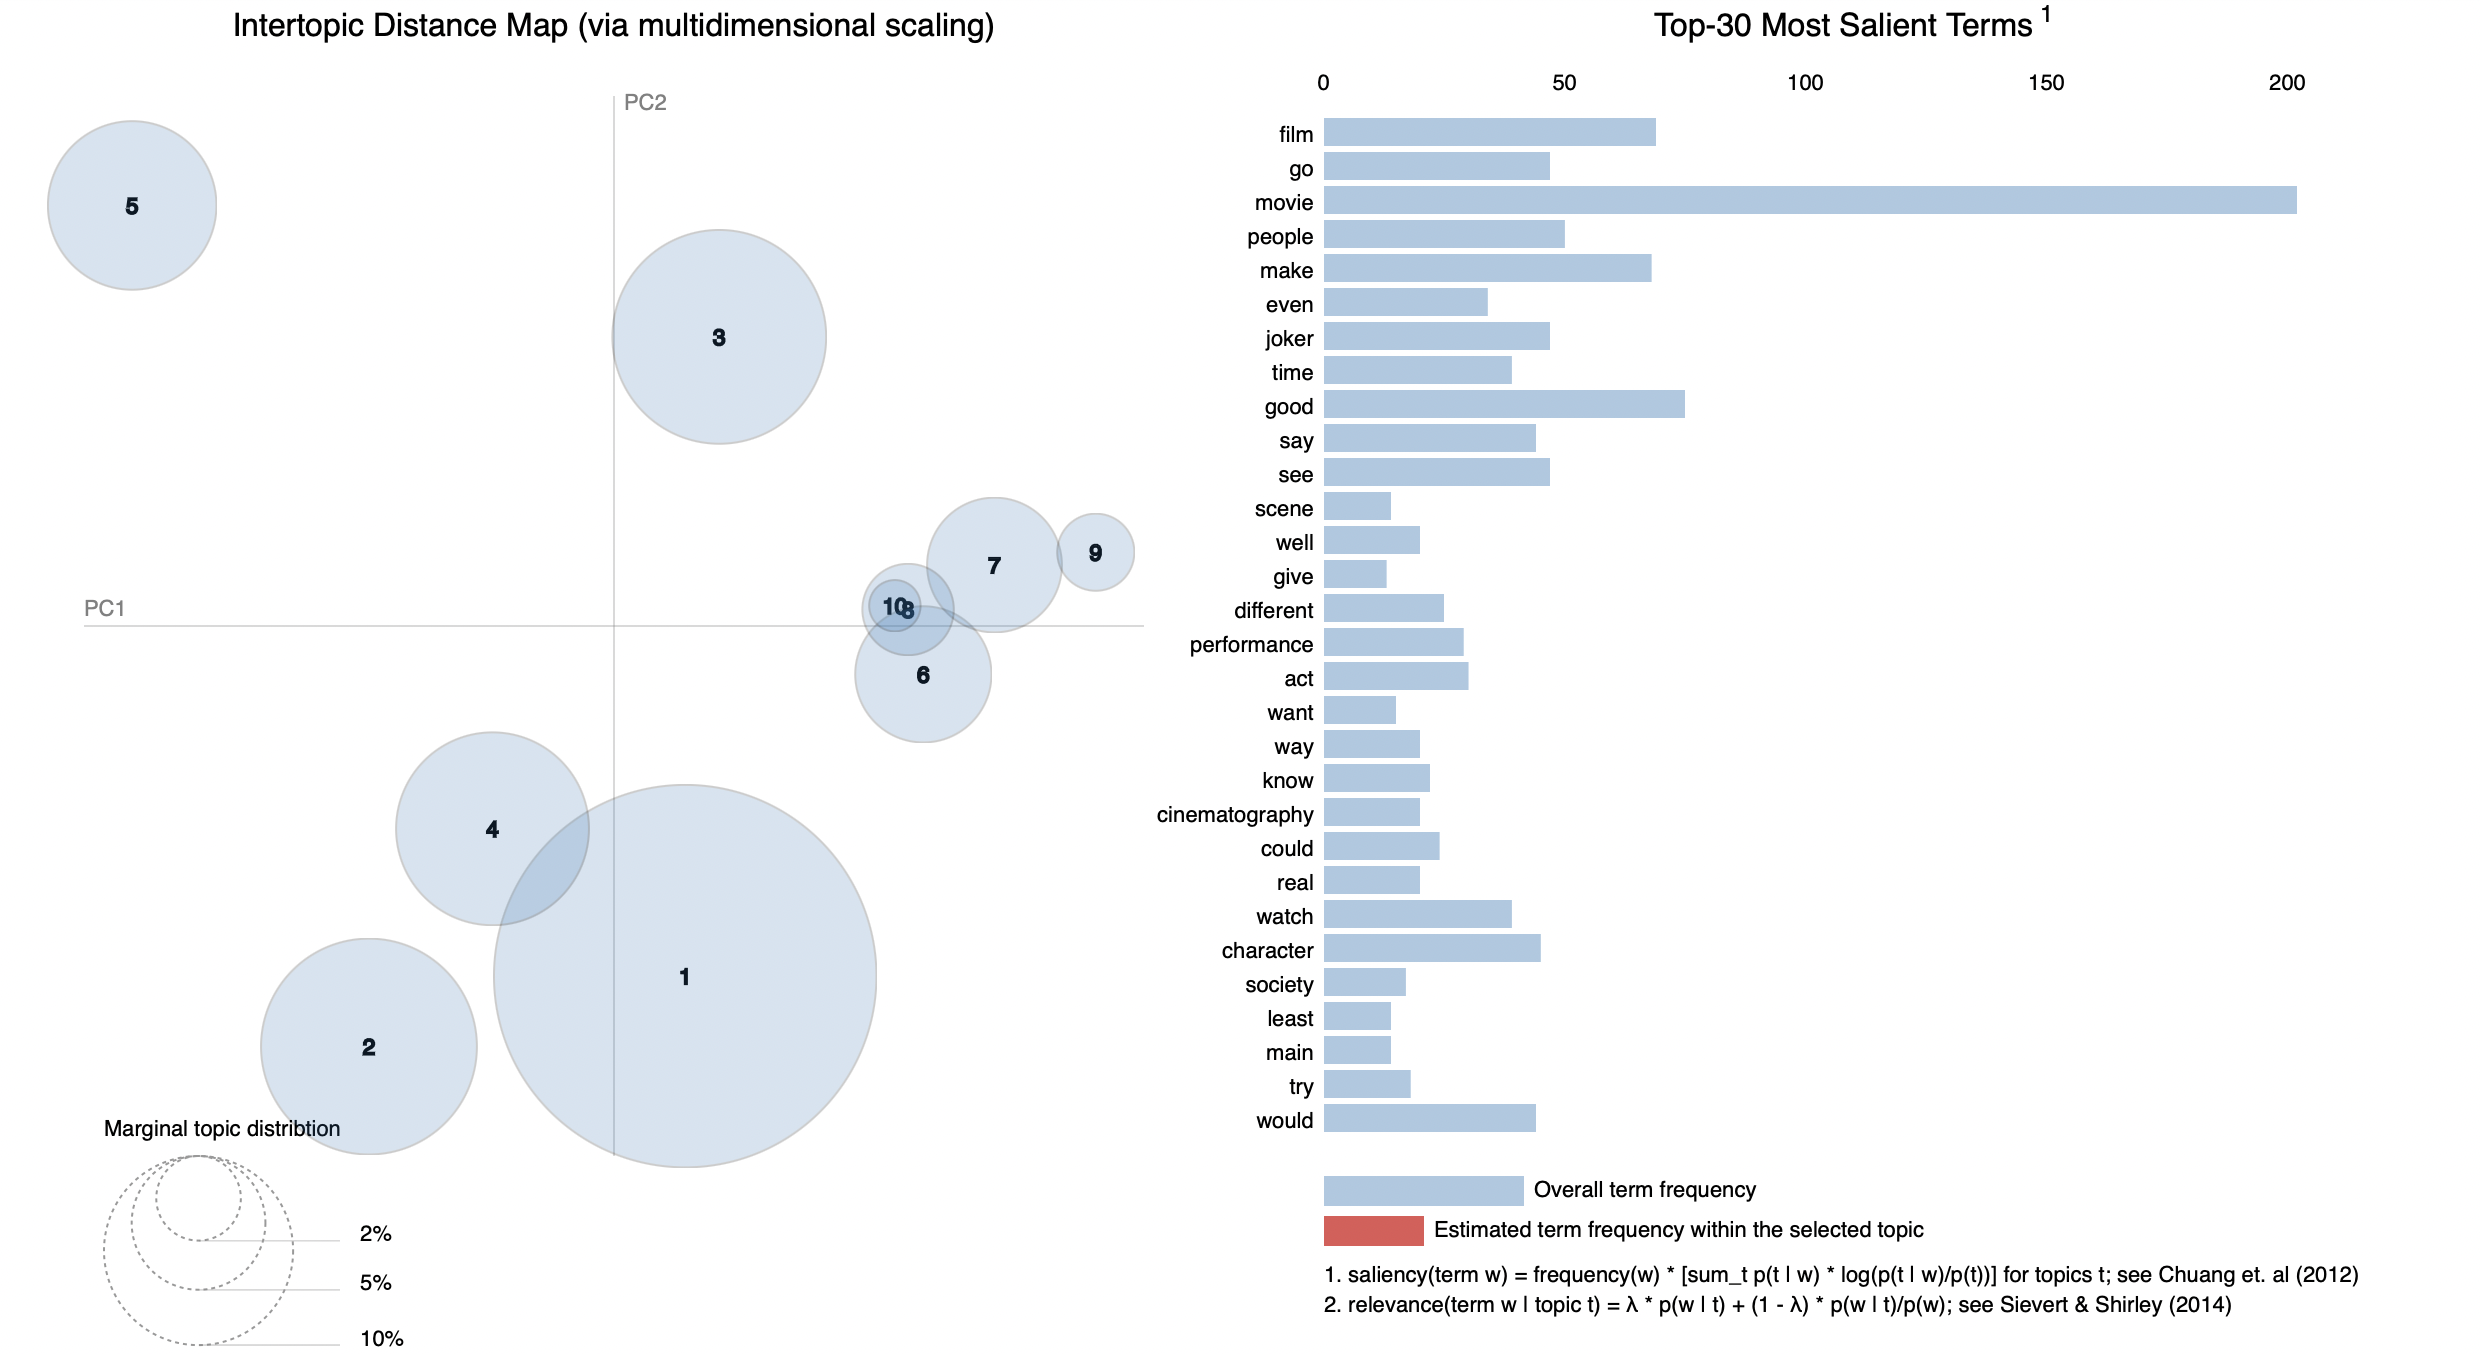

# Generation Bigrams and Trigrams

In [ ]:
from gensim import corpora, models
bigram = models.Phrases(texts, min_count=5, threshold=100)
trigram = models.Phrases(bigram[texts], threshold=100)
bigram_mod = models.phrases.Phraser(bigram)
trigram_mod = models.phrases.Phraser(trigram)
print(trigram_mod[bigram_mod[texts[0]]])

['everi', 'movi', 'come', 'truli', 'make', 'impact', 'joaquin', 'perform', 'scenographi', 'brillianc', 'grotesqu', 'haunt', 'cringi', 'hard', 'watch', 'time', 'mesmer', 'blink', 'eye', 'watch', 'tragic', 'serious', 'funni', 'moment', 'emot', 'rollercoast', 'sometim', 'multipl', 'emot', 'pop', 'time', 'far', 'typic', 'action', 'riddl', 'predict', 'super', 'hero', 'movi', 'proper', 'psycholog', 'thriller', 'drama', 'singl', 'best', 'charact', 'develop', 'ever', 'seen']


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
import spacy
data_words_bigrams = make_bigrams(texts)
nlp = spacy.load('en', disable=['parser', 'ner'])
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(data_lemmatized[:1])

[['come', 'truli', 'make', 'impact', 'watch', 'time', 'mesmer', 'blink', 'eye', 'watch', 'tragic', 'serious', 'moment', 'pop', 'time', 'far', 'typic', 'predict', 'super', 'hero', 'movi', 'proper', 'psycholog', 'drama', 'good', 'charact', 'develop', 'ever', 'see']]


In [ ]:
id2word = corpora.Dictionary(data_lemmatized)
texts = data_lemmatized
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 2)]]


In [ ]:
id2word[0]

'blink'

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('blink', 1),
  ('charact', 1),
  ('come', 1),
  ('develop', 1),
  ('drama', 1),
  ('ever', 1),
  ('eye', 1),
  ('far', 1),
  ('good', 1),
  ('hero', 1),
  ('impact', 1),
  ('make', 1),
  ('mesmer', 1),
  ('moment', 1),
  ('movi', 1),
  ('pop', 1),
  ('predict', 1),
  ('proper', 1),
  ('psycholog', 1),
  ('see', 1),
  ('serious', 1),
  ('super', 1),
  ('time', 2),
  ('tragic', 1),
  ('truli', 1),
  ('typic', 1),
  ('watch', 2)]]

In [ ]:
lda_model = models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics = 10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
from pprint import pprint
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"film" + 0.029*"movi" + 0.025*"watch" + 0.024*"say" + 0.023*"deserv" '
  '+ 0.022*"good" + 0.020*"main" + 0.020*"differ" + 0.020*"perform" + '
  '0.018*"would"'),
 (1,
  '0.068*"screenplay" + 0.059*"oscar" + 0.056*"costum" + 0.015*"score" + '
  '0.007*"expect" + 0.007*"line" + 0.007*"felt" + 0.007*"actor" + 0.004*"tour" '
  '+ 0.004*"exceed"'),
 (2,
  '0.091*"film" + 0.039*"way" + 0.035*"make" + 0.033*"good" + 0.033*"could" + '
  '0.033*"peopl" + 0.030*"show" + 0.030*"differ" + 0.020*"much" + '
  '0.019*"violent"'),
 (3,
  '0.010*"less" + 0.010*"great" + 0.007*"appear" + 0.007*"fiction" + '
  '0.007*"someth" + 0.007*"gun" + 0.007*"despit" + 0.006*"bad" + 0.005*"new" + '
  '0.004*"opinion"'),
 (4,
  '0.057*"make" + 0.046*"even" + 0.040*"time" + 0.033*"see" + 0.028*"differ" + '
  '0.025*"charact" + 0.025*"know" + 0.022*"joker" + 0.022*"scene" + '
  '0.022*"feel"'),
 (5,
  '0.058*"movi" + 0.028*"peopl" + 0.025*"spend" + 0.023*"think" + 0.018*"need" '
  '+ 0.018*"feel" + 0.01

In [ ]:
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(corpus))
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

Perplexity:  -7.17935787023887

Coherence Score:  0.4247429168002247

In [ ]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 5.7MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=1b0c345764ca34ca7841adcb6c373a40e201accadcff8d536b8eb1441cf67f71
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [ ]:

import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.058000 -0.164909       1        1  31.450312
4      0.233434  0.141141       2        1  15.846331
5     -0.037546 -0.017995       3        1  14.031945
8     -0.035054  0.041176       4        1   9.359870
7     -0.094946  0.003656       5        1   8.294039
2      0.207194 -0.105635       6        1   7.620017
6     -0.060560  0.219206       7        1   6.818362
9     -0.112216 -0.111188       8        1   3.693486
3     -0.074429 -0.004250       9        1   1.815309
1     -0.083877 -0.001202      10        1   1.070331, topic_info=         Term       Freq      Total Category  logprob  loglift
53       film  91.000000  91.000000  Default  30.0000  30.0000
81         go  32.000000  32.000000  Default  29.0000  29.0000
107       say  48.000000  48.000000  Default  28.0000  28.0000
11       make  54.000000  54.000000  Default  27.0000  27.0000
343      even  28.000000  28.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
929    random   0.028072   0.936141  Topic10  -7.2869   1.0302
930    sadden   0.028072   0.936141  Topic10  -7.2869   1.0302
116  director   0.142069   6.112844  Topic10  -5.6654   0.7754
83        let   0.029312   3.551944  Topic10  -7.2437  -0.2600
120     great   0.029133  14.859002  Topic10  -7.2498  -1.6973

[459 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1023      8  0.869048    12i
1040      8  0.868417  30min
262       4  0.109839    act
262       5  0.219678    act
262       7  0.659034    act
...     ...       ...    ...
446       4  0.134067  write
446       5  0.268135  write
297       1  0.761858  wrong
298       1  0.935178   year
369       5  0.467546    yet

[509 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 6, 9, 8, 3, 7, 10, 4, 2])

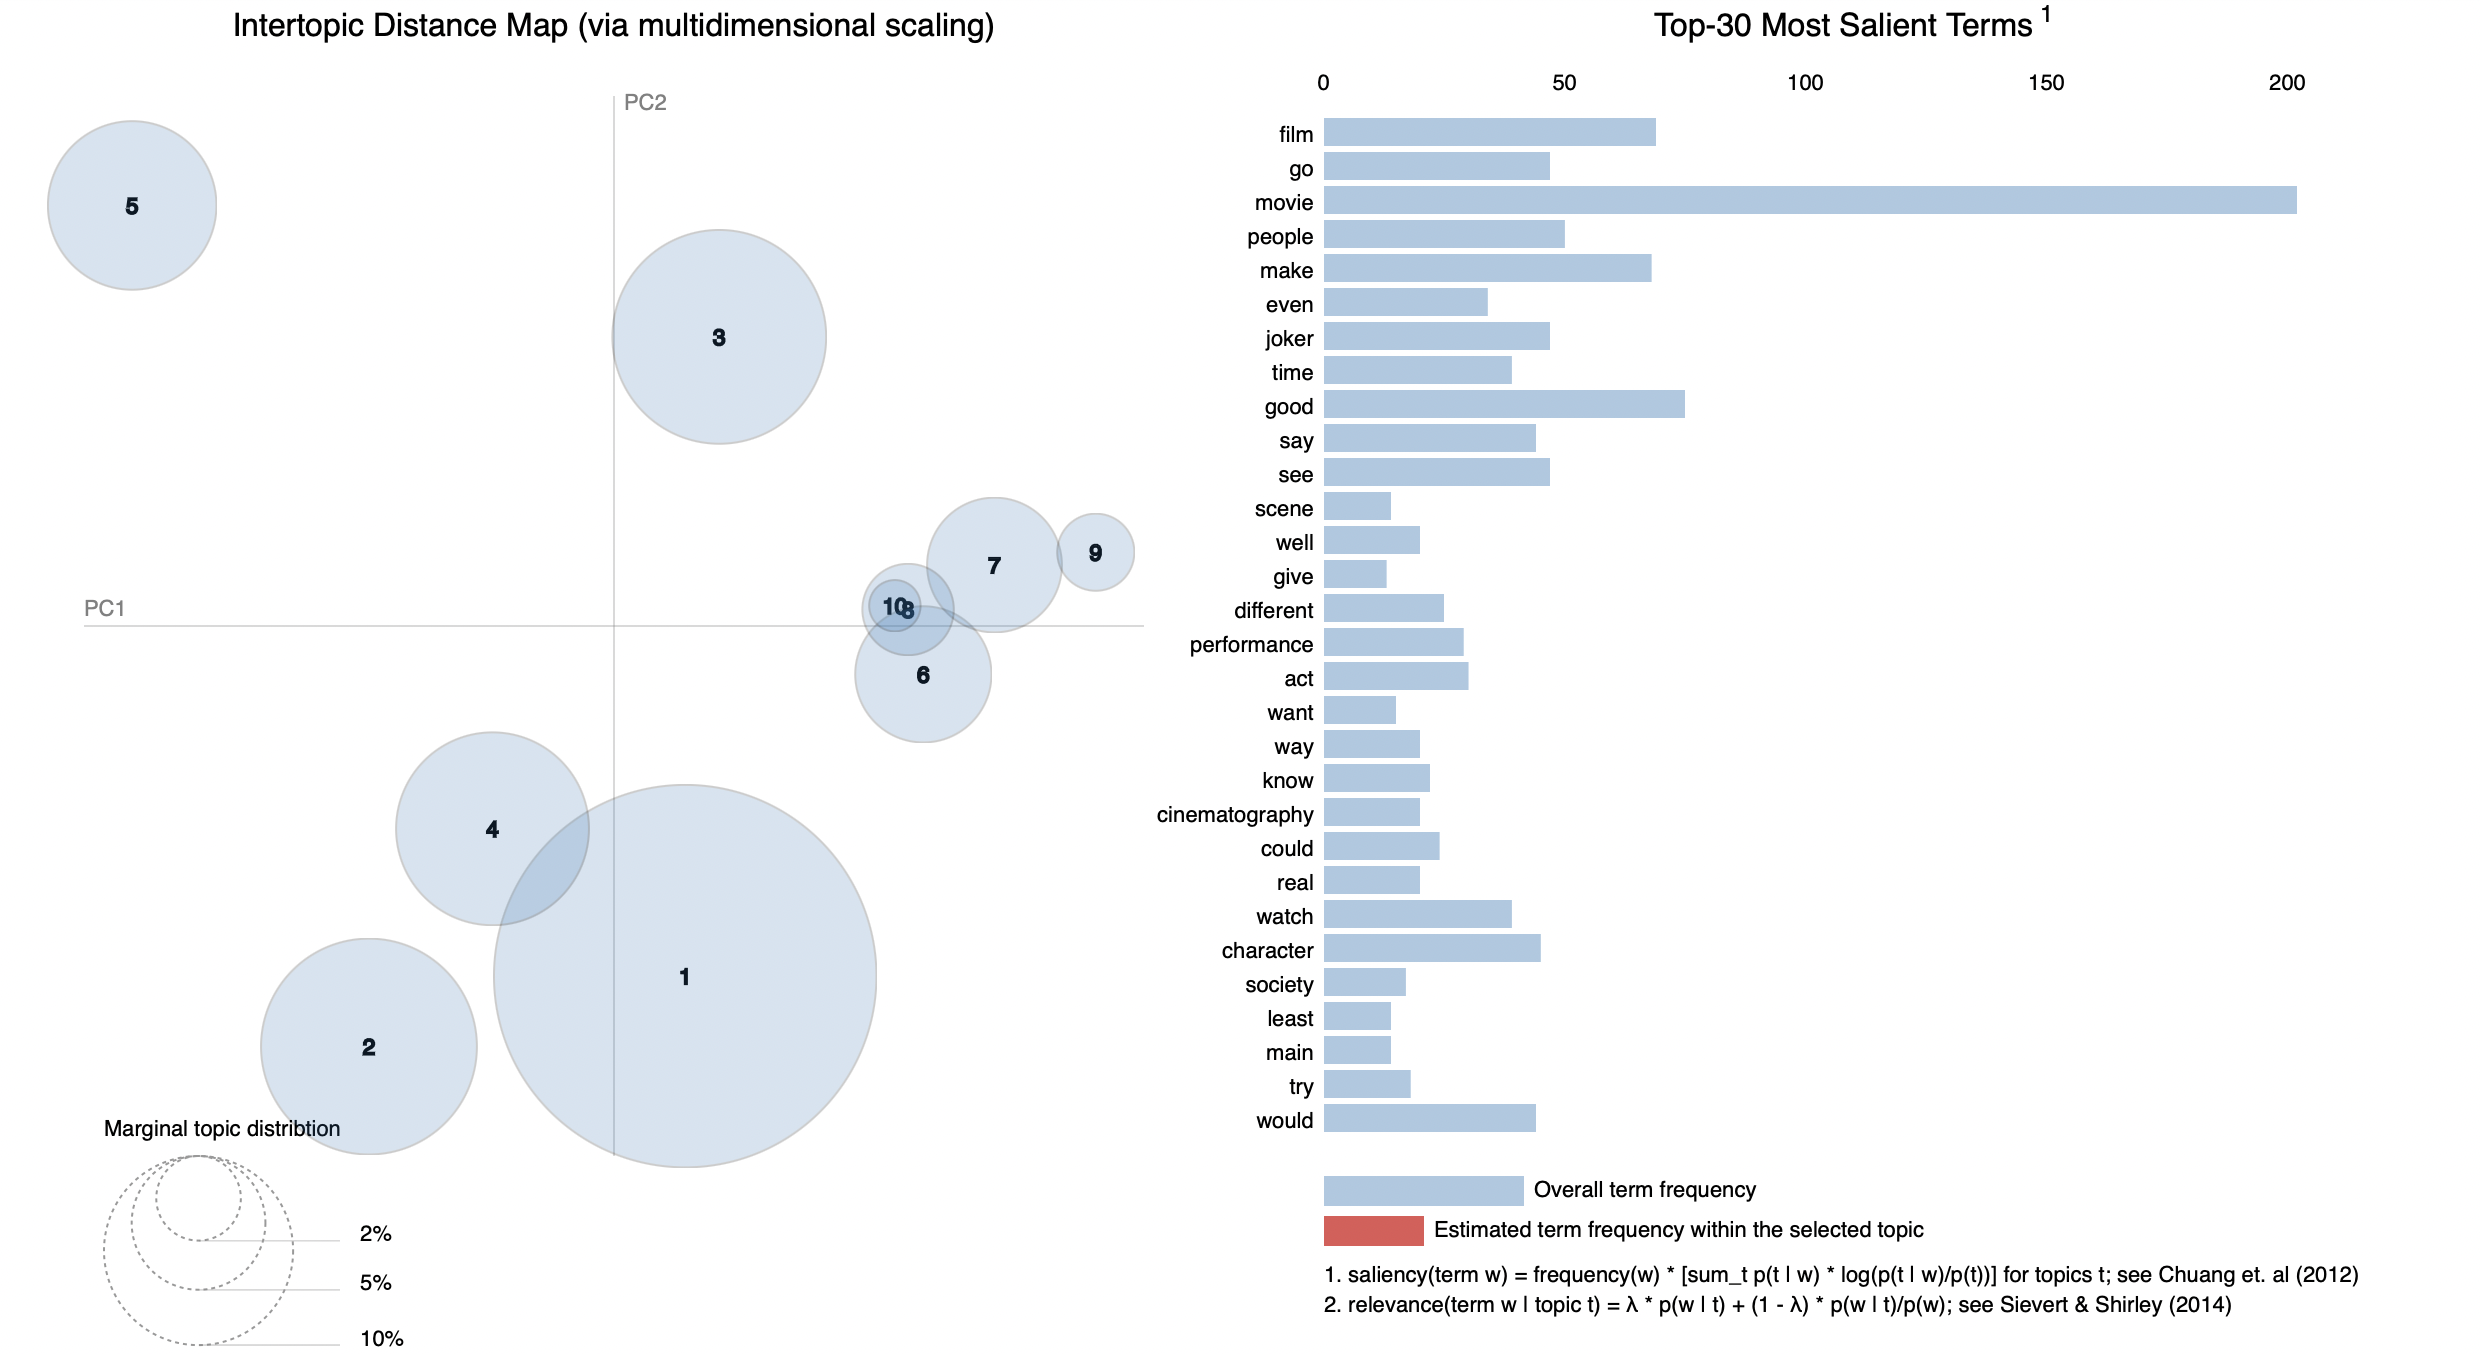

**Latent Semantic Analysis**


In [ ]:
lsamodel = models.LsiModel(corpus, num_topics = 10, id2word = id2word)

In [ ]:
pprint(lsamodel.print_topics(num_topics = 10))

[(0,
  '0.607*"movi" + 0.219*"good" + 0.203*"make" + 0.192*"see" + 0.178*"film" + '
  '0.176*"feel" + 0.135*"say" + 0.133*"watch" + 0.128*"peopl" + 0.126*"time"'),
 (1,
  '0.554*"film" + -0.485*"movi" + 0.160*"could" + 0.137*"feel" + 0.134*"would" '
  '+ 0.127*"good" + 0.116*"way" + 0.113*"show" + 0.107*"violent" + '
  '0.103*"origin"'),
 (2,
  '-0.264*"even" + -0.260*"charact" + -0.254*"go" + 0.207*"peopl" + '
  '0.192*"movi" + -0.176*"differ" + -0.165*"joker" + -0.141*"know" + '
  '0.127*"thing" + -0.123*"see"'),
 (3,
  '0.220*"watch" + 0.214*"film" + 0.205*"think" + -0.189*"may" + 0.172*"tell" '
  '+ -0.158*"charact" + -0.156*"happen" + 0.127*"look" + -0.123*"direct" + '
  '-0.122*"expect"'),
 (4,
  '0.362*"peopl" + 0.329*"also" + 0.304*"film" + -0.197*"feel" + -0.141*"may" '
  '+ 0.139*"actual" + -0.135*"would" + 0.132*"good" + -0.124*"expect" + '
  '-0.121*"get"'),
 (5,
  '0.221*"go" + -0.204*"theme" + -0.204*"make" + 0.197*"film" + '
  '-0.196*"superhero" + -0.178*"even" + -0.173

In [ ]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
  model = models.LsiModel(corpus, num_topics = 10, id2word = id2word)
  model_list.append(model)
  coherencemodel = CoherenceModel(model= model, texts = data['Stemming'], dictionary = id2word, coherence='c_v')
  coherence_values.append(coherencemodel.get_coherence())

/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/direct_confirmation_measure.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
/usr/local/lib/python3.7/dist-packages/gensim/topic_coherence/indirect_confirmation_measure.py:317: RuntimeWarning: invalid value encountered in double_scalars
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))


In [ ]:
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.054*"film" + 0.029*"movi" + 0.025*"watch" + 0.024*"say" + 0.023*"deserv" + 0.022*"good" + 0.020*"main" + 0.020*"differ" + 0.020*"perform" + 0.018*"would"'), (1, '0.068*"screenplay" + 0.059*"oscar" + 0.056*"costum" + 0.015*"score" + 0.007*"expect" + 0.007*"line" + 0.007*"felt" + 0.007*"actor" + 0.004*"tour" + 0.004*"exceed"'), (2, '0.091*"film" + 0.039*"way" + 0.035*"make" + 0.033*"good" + 0.033*"could" + 0.033*"peopl" + 0.030*"show" + 0.030*"differ" + 0.020*"much" + 0.019*"violent"'), (3, '0.010*"less" + 0.010*"great" + 0.007*"appear" + 0.007*"fiction" + 0.007*"someth" + 0.007*"gun" + 0.007*"despit" + 0.006*"bad" + 0.005*"new" + 0.004*"opinion"'), (4, '0.057*"make" + 0.046*"even" + 0.040*"time" + 0.033*"see" + 0.028*"differ" + 0.025*"charact" + 0.025*"know" + 0.022*"joker" + 0.022*"scene" + 0.022*"feel"'), (5, '0.058*"movi" + 0.028*"peopl" + 0.025*"spend" + 0.023*"think" + 0.018*"need" + 0.018*"feel" + 0.014*"good" + 0.014*"make" + 0.014*"plot" + 0.013*"person"'), (6, '0.091*"g

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

(1) Features used for sentiment classification and explain why you select these features.

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
#Importing necessary libraries

import json
import zipfile
import glob
import pandas as pd


from textblob import TextBlob
import sklearn

import json
import zipfile
import glob
import pandas as pd
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
rating = [ ]
review = [ ]
for fileList in glob.iglob('/content/*.json'):
  file=open(fileList)
  textData=json.load(file)
  for item in textData:
      rating.append(item['stars'])
      review.append(item['text'])

In [ ]:
df = pd.DataFrame({'Reviews':review,'Ratings':rating})

In [ ]:
df['Ratings']=df['Ratings'].astype(int)
df

,Reviews,Ratings
0,"As someone who has worked with many museums, I...",2
1,I am actually horrified this place is still in...,1
2,I love Deagan's. I do. I really do. The atmosp...,5
3,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",1
4,"Oh happy day, finally have a Canes near my cas...",4
...,...,...
195,Surprised they didn't open earlier in a Sunday...,4
196,Finding a solid spot to get a quality cut can ...,5
197,ATTENTION DOWNTown: this place has amazing foo...,5
198,A new fav for sure!!! Loving the concept of bu...,5


In [ ]:
# Data Cleaning and processing
df['processedData'] = df['Reviews'].apply(lambda item: " ".join(item.lower() for item in item.split()))
df['processedData'] = df['processedData'].str.replace('[^\w\s]','')
df['cprocessedData'] = df['processedData'].apply(lambda item: " ".join(item for x in item.split() if item not in stop))
high_freq = pd.Series(' '.join(df['processedData']).split()).value_counts()[:10]
high_freq = list(high_freq.index)
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item for item in item.split() if item not in high_freq))
low_freq = pd.Series(' '.join(df['processedData']).split()).value_counts()[-10:]
low_freq = list(low_freq.index)
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item for item in item.split() if item not in low_freq))

df['processedData'] = df['Reviews'].str.replace('[^\w\s]','')
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item.lower() for item in item.split()))
df['processedData'] = df['processedData'].apply(lambda item: " ".join(item for item in item.split() if item not in stop))

In [ ]:
def sentimentValues(x):
    if x == 5:
        return 'Very positive'
    if x == 4:
        return 'Positive'
    if x == 3:
        return 'Neutral'
    if x == 2:
        return 'Negative'
    if x == 1:
        return 'Very negative'
    
df['sentimentValues'] = df['Ratings'].apply(lambda item: sentimentValues(item))
train, test = sklearn.model_selection.train_test_split(df, train_size=0.8, test_size=0.2)

In [ ]:
svc_pipeline = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', LinearSVC())])
svc = svc_pipeline.fit(train['processedData'], train['sentimentValues'])
test['sentimentPred'] = svc.predict(test['processedData'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print('Displaying below are TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS Data:', '\n')
print(test[['Reviews', 'sentimentValues', 'sentimentPred']])
recall_val = recall_score(test['sentimentValues'], test['sentimentPred'], average='macro')
precision_val = precision_score(test['sentimentValues'], test['sentimentPred'], average='macro')
accuracy_val = accuracy_score(test['sentimentValues'], test['sentimentPred'])*100
f1_val = f1_score(test['sentimentValues'], test['sentimentPred'], average='macro')

print('f1-score of LinearSVC :', f1_val)
print('Accuracy of LinearSVC :', accuracy_val)
print('Recall score of LinearSVC :', recall_val)
print('Precision score of LinearSVC :', precision_val)

Displaying below are TFIDF-BASED LINEARSVC SENTIMENT ANALYSIS Data: 

                                               Reviews  ...  sentimentPred
61   Cleats is the best! Our daughter pitches and w...  ...  Very positive
17   A close friend was in town and so instead of t...  ...  Very positive
184  Fantastic service, atmosphere and food.  We at...  ...  Very positive
11   ORDER In (Delivery) Review\n\nI discovered thi...  ...       Positive
117  I saw Big Jim's on Diners, Drive-ins and Dives...  ...  Very positive
163  I was excited to try this place after seeing t...  ...  Very positive
6    Really good place with simple decor, amazing f...  ...       Positive
44   Was super excited to bring my boyfriend to thi...  ...  Very negative
47   Happy to give a strong recommendation to this ...  ...  Very positive
72   I ordered a pizza at 4:49. Got an email that s...  ...  Very negative
36   Who knew?\n \nI did! \n\nI remember eating man...  ...  Very positive
198  A new fav for sure!!! Lov

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
nb_pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', MultinomialNB())])
nb = nb_pipeline.fit(train['processedData'], train['sentimentValues'])
test['sentimentPredicted'] = nb.predict(test['processedData'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:

print('\n', 'Display of MultinomialNB SENTIMENT ANALYSIS:', '\n', test[['Reviews', 'sentimentValues', 'sentimentPredicted']].head(10))
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
recallNB = recall_score(test['sentimentValues'], test['sentimentPredicted'], average='macro')
precisionNB = precision_score(test['sentimentValues'], test['sentimentPredicted'], average='macro')
accuracyNB = accuracy_score(test['sentimentValues'], test['sentimentPredicted'])*100
f1NB = f1_score(test['sentimentValues'], test['sentimentPredicted'], average='macro')
print('Recall score of  MultinomialNB:', recallNB)
print('Accuracy of MultinomialNB:', accuracyNB)
print('f1-score of MultinomialNB:', f1NB)
print('Precision score of MultinomialNB:', precisionNB)



 Display of MultinomialNB SENTIMENT ANALYSIS: 
                                                Reviews  ... sentimentPredicted
61   Cleats is the best! Our daughter pitches and w...  ...      Very positive
17   A close friend was in town and so instead of t...  ...      Very positive
184  Fantastic service, atmosphere and food.  We at...  ...      Very positive
11   ORDER In (Delivery) Review\n\nI discovered thi...  ...      Very positive
117  I saw Big Jim's on Diners, Drive-ins and Dives...  ...      Very positive
163  I was excited to try this place after seeing t...  ...      Very positive
6    Really good place with simple decor, amazing f...  ...      Very positive
44   Was super excited to bring my boyfriend to thi...  ...      Very positive
47   Happy to give a strong recommendation to this ...  ...      Very positive
72   I ordered a pizza at 4:49. Got an email that s...  ...      Very positive

[10 rows x 3 columns]
Recall score of  MultinomialNB: 0.2
Accuracy of Multinomial

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbAnalysis = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier(n_estimators=15,verbose=2))])
analysis = gbAnalysis.fit(train['processedData'], train['sentimentValues'])
test['GBsentimentPredicted'] = analysis.predict(test['processedData'])

      Iter       Train Loss   Remaining Time 
         1         206.2128            0.28s
         2         186.7373            0.26s
         3         174.3198            0.24s
         4         158.2994            0.23s
         5         147.5338            0.21s
         6         139.0154            0.19s
         7         129.9867            0.17s
         8         121.9620            0.15s
         9         114.8553            0.13s
        10         108.6394            0.11s
        11         103.8327            0.08s
        12          98.8291            0.06s
        13          94.3818            0.04s
        14          90.2833            0.02s
        15          86.6876            0.00s


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print('GRADIENTBOOSTING SENTIMENT ANALYSIS:', '\n')
print(test[['Reviews', 'sentimentValues', 'GBsentimentPredicted']].head(10))

recallGB = recall_score(test['sentimentValues'], test['GBsentimentPredicted'], average='macro')
precisionGB = precision_score(test['sentimentValues'], test['GBsentimentPredicted'], average='macro')
accuracyGB = accuracy_score(test['sentimentValues'], test['GBsentimentPredicted'])*100
f1GB = f1_score(test['sentimentValues'], test['GBsentimentPredicted'], average='macro')
print('Recall  of GradientBoosting:', recallGB)
print('Accuracy of GradientBoosting:', accuracyGB)
print('f1-score of GradientBoosting:', f1GB)
print('Precision  of GradientBoosting:', precisionGB)


GRADIENTBOOSTING SENTIMENT ANALYSIS: 

                                               Reviews  ... GBsentimentPredicted
61   Cleats is the best! Our daughter pitches and w...  ...        Very positive
17   A close friend was in town and so instead of t...  ...             Positive
184  Fantastic service, atmosphere and food.  We at...  ...        Very positive
11   ORDER In (Delivery) Review\n\nI discovered thi...  ...        Very positive
117  I saw Big Jim's on Diners, Drive-ins and Dives...  ...             Positive
163  I was excited to try this place after seeing t...  ...        Very positive
6    Really good place with simple decor, amazing f...  ...             Positive
44   Was super excited to bring my boyfriend to thi...  ...             Positive
47   Happy to give a strong recommendation to this ...  ...             Positive
72   I ordered a pizza at 4:49. Got an email that s...  ...        Very negative

[10 rows x 3 columns]
Recall  of GradientBoosting: 0.2761904761904762

# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download here: https://github.com/unt-iialab/info5731_spring2021/blob/main/assignment/assignment4-question3-data.zip. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
import pandas as pd
# Reading the data files 
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
# checking if any null values exist summing them
train_data.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

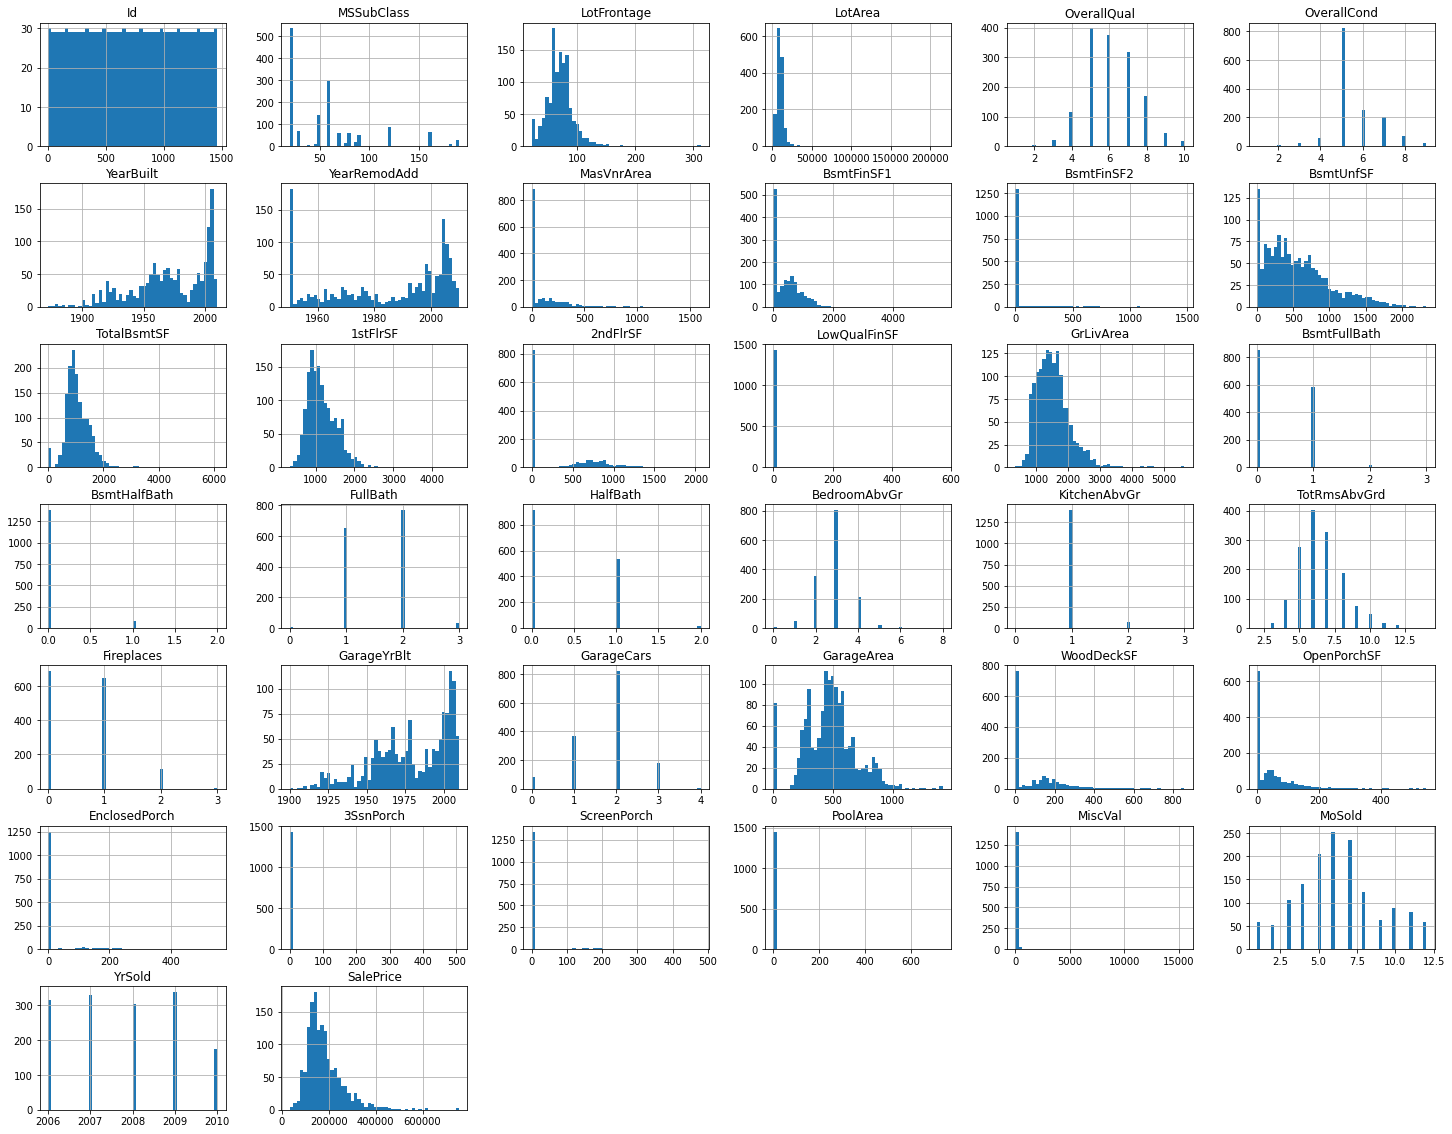

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(25,20))
plt.savefig("attribute_histogram_plots")
plt.show()

In [ ]:
cormatrix = train_data.corr()
cormatrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

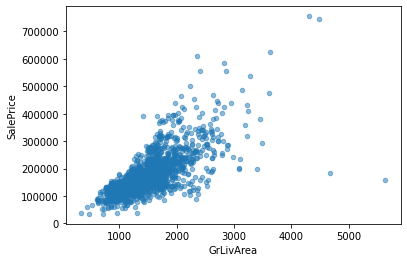

In [ ]:
train_data.plot(kind="scatter",  y="SalePrice", x="GrLivArea", alpha=0.5)

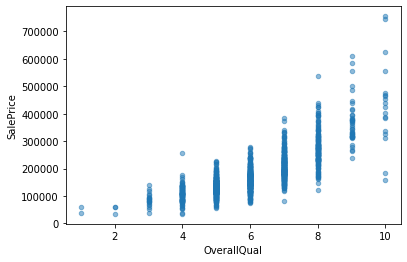

In [ ]:
train_data.plot(kind="scatter", y="SalePrice", x="OverallQual", alpha=0.5)

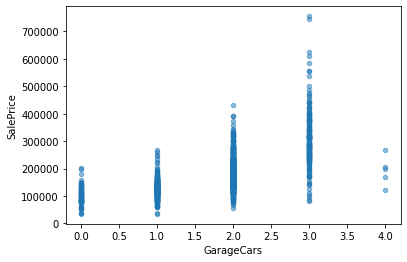

In [ ]:
train_data.plot(kind="scatter", y="SalePrice",  x="GarageCars",alpha=0.5)

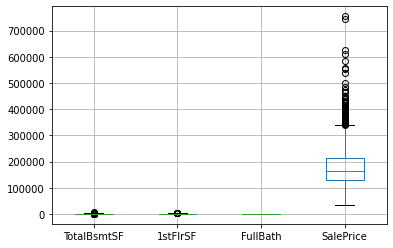

In [ ]:
train_data.boxplot(column=['TotalBsmtSF', '1stFlrSF', 'FullBath', 'SalePrice'])

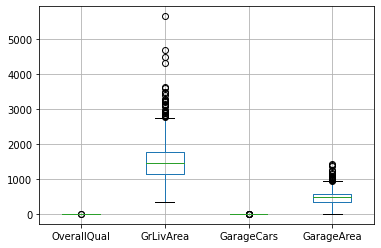

In [ ]:
train_data.boxplot(column=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'])

In [ ]:
train_data.fillna(train_data.mean(), inplace = True)
test_data.fillna(test_data.mean(), inplace = True)

In [ ]:
train_data.isnull().sum()


Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
test_data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64

In [ ]:
# Encoding the data
from sklearn.preprocessing import LabelEncoder
columns = ('GarageCond', 'LandContour', 'RoofStyle', 'RoofMatl', 'Heating', 'MiscFeature', 'SaleType', 'GarageType', 'Electrical', 'SaleCondition', 'Foundation', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'FireplaceQu', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'Utilities', 'BldgType', 'HouseStyle','PoolQC', 'BsmtQual', 'BsmtCond', 'GarageQual','BsmtExposure', 'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1','BsmtFinType2', 'Functional', 'Fence', 'GarageFinish', 'LandSlope','LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 'YrSold', 'MoSold', 'MSZoning')
for column in columns:
    encoder = LabelEncoder()
    encoder.fit(list(train_data[column].values))
    train_data[column] = encoder.transform(list(train_data[column].values))




In [ ]:
for column in columns:
    encoder_test = LabelEncoder()
    encoder_test.fit(list(test_data[column].values))
    test_data[column] = encoder_test.transform(list(test_data[column].values))

In [ ]:
x_values = train_data[train_data.columns[:80]]
x_test_values = test_data[test_data.columns[:80]]
y_values = train_data['SalePrice']

In [ ]:
# Training regression model

from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(x_values, y_values)
reg_model.score(x_values, y_values)

0.8548395143943592

In [ ]:
predicted = reg_model.predict(x_test_values)

In [ ]:
pd.DataFrame({'Predicted House Price Values': predicted})

,Predicted House Price Values
0,184936.609022
1,239791.092108
2,245071.890618
3,263617.412688
4,263185.252850
...,...
1454,152148.218848
1455,138020.527442
1456,225624.228917
1457,196336.422912
